# ECG Dataset

---

1. Import Main Packages
2. Loading Data
3. First View on the Data
4. EDA
5. Data Processing
6. Base Model
7. Feature Selection
8. Hyperparameter Tuning
9. Test Final mMdel on the Testdata
10. Discussion of further improvements

---

## 1. Import Main Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

## 2. Loading Data

In [2]:
df = pd.read_csv("D:\Programming\Python\Kaggle\ECG\mitbih_train.csv\mitbih_train.csv", header = None)

In [3]:
df.head()

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

## First View on the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [5]:
df.describe()

0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240      0.171778      0.168357   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.088416      0.073333      0.066116      0.065000      0.068639   
50%        0.158798      0.145324      0.144424      0.150000      0.148734   
75%        0.287628      0.298237      0.295391      0.290832      0.283636   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...           178           179           180           181  \
count  ...  87554.000000  87554.000000  87554.000000  87554.000000   
mean   ...      0.005025      0.004628      0.004291      0.003945   
std    ...      0.044154      0.042089      0.040525      0.038651   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                182           183           184           185           186  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.003681      0.003471      0.003221      0.002945      0.002807   
std        0.037193      0.036255      0.034789      0.032865      0.031924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                187  
count  87554.000000  
mean       0.473376  
std        1.143184  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 188 columns]

Check for null values.

In [6]:
df.isnull().values.sum()

0

Check the number of cases for each class.

In [7]:
df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

## EDA

([<matplotlib.patches.Wedge at 0x2acdfc8dc10>,
 [Text(-0.9427974976112825, 0.5666858728589446, 'Normal'),
  Text(0.7246136625914988, -0.8276080231521041, 'Unknown'),
  Text(1.0074182091923962, -0.44171093691189695, 'Ventricular'),
  Text(1.091312106928212, -0.13797784340939367, 'Supraventricular'),
  Text(1.0997090556586326, -0.025298081002296184, 'Fusion')],
 [Text(-0.5142531805152449, 0.30910138519578795, '82.8%'),
  Text(0.3952438159589993, -0.45142255808296583, '7.3%'),
  Text(0.5495008413776705, -0.2409332383155801, '6.6%'),
  Text(0.5952611492335701, -0.07526064185966927, '2.5%'),
  Text(0.5998413030865268, -0.013798953273979736, '0.7%')])

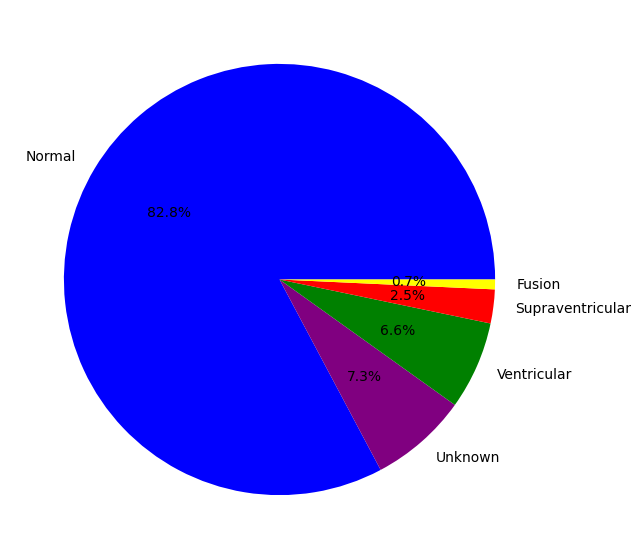

In [8]:
plt.figure(figsize=(7,7))
plt.pie(df[187].value_counts(), labels = ["Normal","Unknown","Ventricular","Supraventricular","Fusion"],colors= ['blue','purple','green','red','yellow'],autopct='%3.1f%%')

In [9]:
color = ['blue','red','green','yellow','purple']
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]

Showing one case for each class in comparison.

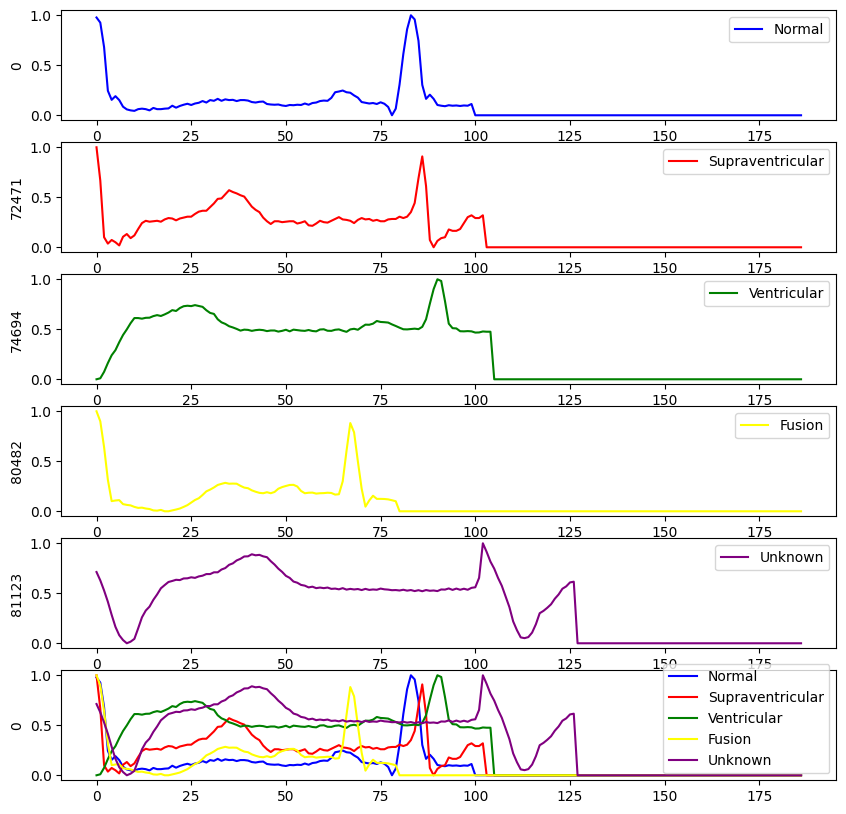

In [10]:
fig, ax = plt.subplots(6, figsize=(10, 10))

for i in range(5):
    t = sns.lineplot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i], ax=ax[i])
    t = sns.lineplot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i], ax=ax[5])


The last 50 features are always 0 and may could be dropped.

Here 100 cases for each class is presented together to show the variance in each class.

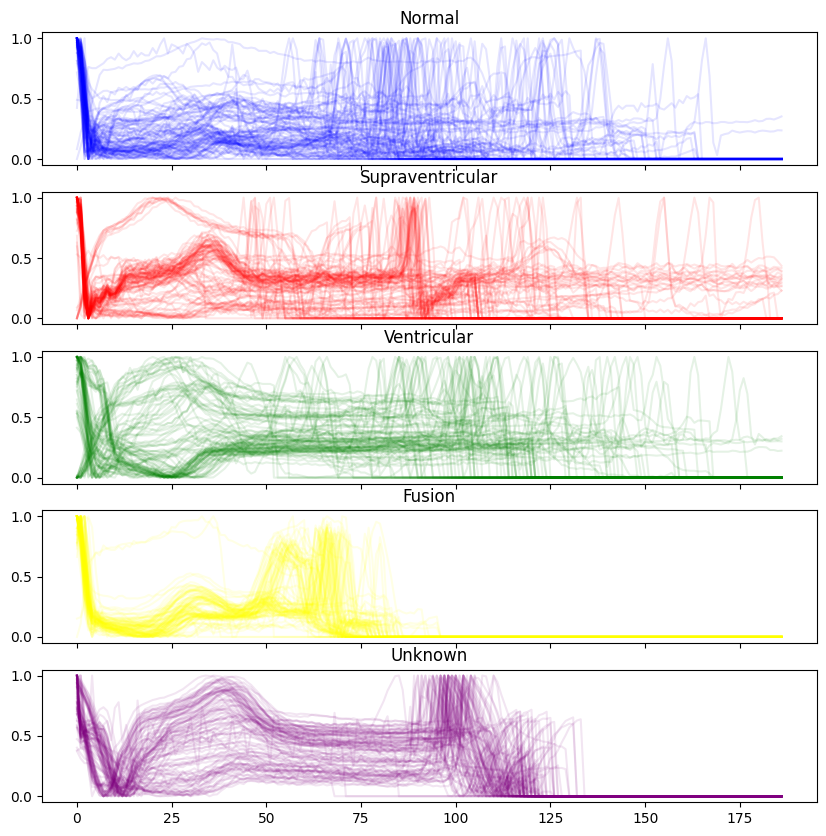

In [11]:
fig, ax = plt.subplots(5,  sharex=True, sharey=True,figsize=(10,10))
for j in range(5):
    for i in range(100):
        t = ax[j].plot((df[df[187] == j].iloc[i])[:-1], color=color[j], alpha = 0.1)
    ax[j].title.set_text(label[j]) 
  


It shows that at least for the first 3 classes, the last 50 features do hold value.

## Data Processing

In [12]:
df.shape

(87554, 188)

Drop duplicates.

In [13]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

(87554, 188)

Divide the trainingsdata into trainins and validationdata that have the sae distribution of classes.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df, df[187]):
    X = df.iloc[train_index]
    X_valid = df.iloc[valid_index]

In [15]:
X[187].value_counts() / len(X)

0.0    0.827734
4.0    0.073455
2.0    0.066102
1.0    0.025384
3.0    0.007324
Name: 187, dtype: float64

In [16]:
X_valid[187].value_counts() / len(X_valid)

0.0    0.827708
4.0    0.073440
2.0    0.066130
1.0    0.025413
3.0    0.007310
Name: 187, dtype: float64

Division of features and labels.

In [17]:
y = X[187]
y_valid = X_valid[187]
X.pop(187)
X_valid.pop(187)


32695    0.0
57704    0.0
69505    0.0
16459    0.0
57169    0.0
        ... 
28885    0.0
55809    0.0
62061    0.0
50975    0.0
68323    0.0
Name: 187, Length: 17511, dtype: float64

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif

Scaling of the data.

In [19]:
scaler=StandardScaler()

In [20]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X_valid = scaler.transform(X_valid)
X_valid = pd.DataFrame(X_valid)


## Base Model

The base model will give a first impression on the accuracy that can be expected regarding this dataset.

In [21]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import math


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X.shape[1:]))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [22]:

import keras.callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
#onecycle = OneCycleScheduler(math.ceil(len(X) / 32) * 32, max_rate=0.05)


history=model.fit(X, y, epochs=100,
          validation_data=(X_valid,y_valid),
          callbacks = early_stopping_cb, batch_size=32)# class_weight=class_weights)

Epoch 1/100
2189/2189 [==============================] - 10s 3ms/step - loss: 0.2148 - accuracy: 0.9426 - val_loss: 0.1637 - val_accuracy: 0.9548
Epoch 2/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1427 - accuracy: 0.9609 - val_loss: 0.1265 - val_accuracy: 0.9658
Epoch 3/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1213 - accuracy: 0.9667 - val_loss: 0.1162 - val_accuracy: 0.9685
Epoch 4/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1113 - accuracy: 0.9689 - val_loss: 0.1212 - val_accuracy: 0.9676
Epoch 5/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1009 - accuracy: 0.9718 - val_loss: 0.1143 - val_accuracy: 0.9683
Epoch 6/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.0972 - accuracy: 0.9722 - val_loss: 0.1055 - val_accuracy: 0.9721
Epoch 7/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.0928 - accuracy: 0.9731 - val_loss: 0.1105 - val_a

In [23]:
predictions = model.predict(X_valid)

548/548 [==============================] - 1s 1ms/step


In [24]:
predictions=np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14494
         1.0       0.93      0.64      0.76       445
         2.0       0.95      0.91      0.93      1158
         3.0       0.75      0.75      0.75       128
         4.0       0.99      0.96      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.92      0.85      0.88     17511
weighted avg       0.98      0.98      0.97     17511



In [26]:
model.evaluate(X_valid, y_valid)

548/548 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9757


[0.08913033455610275, 0.9757295250892639]

The accuracy is already quite good with 97.57% but can be improved with feature selection andParametertuning.

## Feature Selection

For Feature Selection i use a PCA that keeps 97% of the variance in the dataset.

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

class PCA_97_Selector(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_reduced = pca_fit.transform(X)
        X=pd.DataFrame(X_reduced)
        return X

In [28]:
pca = PCA(n_components=0.97)
pca_fit = pca.fit(X)

In [29]:
pipeline =  Pipeline([
        ("scaler", StandardScaler()),
        ("PCA", PCA_97_Selector())
])

In [30]:
X = pipeline.fit_transform(X)
X = pd.DataFrame(X)
X_valid = pipeline.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid)


In [31]:
X.shape

(70043, 52)

The number of features were reduced from 187 to only 52.
Lets try these new features! Hopefully our accuracy did not decrease.

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X.shape[1:]))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [33]:
history=model.fit(X, y, epochs=100,
          validation_data=(X_valid,y_valid),
          callbacks = early_stopping_cb, batch_size=32)

Epoch 1/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.2149 - accuracy: 0.9418 - val_loss: 0.1662 - val_accuracy: 0.9559
Epoch 2/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1453 - accuracy: 0.9605 - val_loss: 0.1391 - val_accuracy: 0.9623
Epoch 3/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1247 - accuracy: 0.9659 - val_loss: 0.1303 - val_accuracy: 0.9648
Epoch 4/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1153 - accuracy: 0.9678 - val_loss: 0.1280 - val_accuracy: 0.9660
Epoch 5/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1068 - accuracy: 0.9701 - val_loss: 0.1187 - val_accuracy: 0.9685
Epoch 6/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1018 - accuracy: 0.9716 - val_loss: 0.1136 - val_accuracy: 0.9671
Epoch 7/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.0967 - accuracy: 0.9730 - val_loss: 0.1101 - val_ac

In [34]:
predictions = model.predict(X_valid)
predictions=np.argmax(predictions, axis=1)


548/548 [==============================] - 1s 1ms/step


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14494
         1.0       0.81      0.69      0.74       445
         2.0       0.94      0.93      0.93      1158
         3.0       0.79      0.62      0.70       128
         4.0       0.97      0.98      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.90      0.84      0.87     17511
weighted avg       0.97      0.98      0.97     17511



In [36]:
model.evaluate(X_valid, y_valid)

548/548 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9755


[0.0903250128030777, 0.9755011200904846]

The accuracy did improve but with Paranetertuning it could improve even more.

## Hyperparameter Tuning

For the tuning i use the predefined validationset from before instead of crossvalidation because of limited processing power.

In [37]:
from sklearn.model_selection import  PredefinedSplit
split_index = [-1]*len(X)+[0]*len(X_valid)
X_split = pd.concat([X, X_valid], axis=0)
Y_split = pd.concat([y, y_valid], axis=0)
pds = PredefinedSplit(test_fold=split_index)
print(pd.DataFrame(split_index).value_counts())

-1    70043
 0    17511
dtype: int64


First i find the good architecture (number of layers and neurons) using a grid search.

In [67]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
keras.backend.clear_session()
def create_model(neurons, layers):
 # create model
   model = Sequential()
   model.add(keras.layers.Flatten(input_shape=X.shape[1:]))
   for i in range(layers):
    model.add(keras.layers.Dense(neurons,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

   model.add(keras.layers.Dense(5, activation="softmax"))
   optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
   model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
   return model
 
model = KerasClassifier(model=create_model, epochs=20, verbose=0)
neurons = [50, 75, 100, 150]
layers = [2, 3, 4]

param_grid = dict(model__neurons=neurons, model__layers=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_split, Y_split, callbacks = early_stopping_cb, batch_size = 32)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977328 using {'model__layers': 3, 'model__neurons': 150}
0.974884 (0.000536) with: {'model__layers': 2, 'model__neurons': 50}
0.976266 (0.001960) with: {'model__layers': 2, 'model__neurons': 75}
0.974107 (0.001619) with: {'model__layers': 2, 'model__neurons': 100}
0.974382 (0.001287) with: {'model__layers': 2, 'model__neurons': 150}
0.974267 (0.001513) with: {'model__layers': 3, 'model__neurons': 50}
0.975364 (0.001987) with: {'model__layers': 3, 'model__neurons': 75}
0.975524 (0.002692) with: {'model__layers': 3, 'model__neurons': 100}
0.977328 (0.002022) with: {'model__layers': 3, 'model__neurons': 150}
0.974450 (0.001605) with: {'model__layers': 4, 'model__neurons': 50}
0.976780 (0.001615) with: {'model__layers': 4, 'model__neurons': 75}
0.955091 (0.028545) with: {'model__layers': 4, 'model__neurons': 100}
0.976940 (0.001855) with: {'model__layers': 4, 'model__neurons': 150}


Now i find the right learning rate schedule using randomized search because here are more variables and random search is more efficient in these cases.

In [76]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import schedules
keras.backend.clear_session()
def create_model(learning_rate, momentum, decay, nesterov):
 # create model
   model = Sequential()
   model.add(keras.layers.Flatten(input_shape=X.shape[1:]))
   for i in range(3):
    model.add(keras.layers.Dense(150,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

   model.add(keras.layers.Dense(5, activation="softmax"))
   s = 20 * len(X) // 32
   learning_schedule = keras.optimizers.schedules.ExponentialDecay(learning_rate, s, decay)
   optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=momentum, nesterov=nesterov)
   model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
   return model
 
model = KerasClassifier(model=create_model, epochs=25, verbose=0)
nesterov=[True, False]
learning_rate = [1e-2, 5e-3, 1e-3]
decay =[0.1, 5e-2, 1e-2]
momentum = [0.8, 0.9, 0.95]

param_grid = dict(model__learning_rate=learning_rate, model__momentum=momentum, model__decay=decay, model__nesterov=nesterov)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=1, cv=3, n_iter=15)
grid_result = grid.fit(X_split, Y_split, callbacks = early_stopping_cb, batch_size =32)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982434 using {'model__nesterov': False, 'model__momentum': 0.95, 'model__learning_rate': 0.01, 'model__decay': 0.1}
0.977580 (0.000815) with: {'model__nesterov': True, 'model__momentum': 0.8, 'model__learning_rate': 0.005, 'model__decay': 0.1}
0.981828 (0.000629) with: {'model__nesterov': True, 'model__momentum': 0.95, 'model__learning_rate': 0.01, 'model__decay': 0.01}
0.981383 (0.000784) with: {'model__nesterov': False, 'model__momentum': 0.9, 'model__learning_rate': 0.01, 'model__decay': 0.05}
0.974290 (0.001470) with: {'model__nesterov': True, 'model__momentum': 0.9, 'model__learning_rate': 0.001, 'model__decay': 0.1}
0.979236 (0.000742) with: {'model__nesterov': True, 'model__momentum': 0.8, 'model__learning_rate': 0.01, 'model__decay': 0.05}
0.977043 (0.000927) with: {'model__nesterov': True, 'model__momentum': 0.8, 'model__learning_rate': 0.005, 'model__decay': 0.05}
0.982434 (0.000650) with: {'model__nesterov': False, 'model__momentum': 0.95, 'model__learning_rate': 0.0

loss function, batchsize and activation function will stay the same for now but mets try some alpha dropout.

In [78]:

model_alpha = keras.models.Sequential()
model_alpha.add(keras.layers.Flatten(input_shape=X.shape[1:]))
for i in range(3):
    model_alpha.add(keras.layers.Dense(150,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
    model_alpha.add(keras.layers.AlphaDropout(rate=0.1))

model_alpha.add(keras.layers.Dense(5, activation="softmax"))
s = 20 * len(X) // 32
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=0.95, nesterov=False)

model_alpha.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [79]:
history=model_alpha.fit(X, y, epochs=100,
          validation_data=(X_valid,y_valid),
          callbacks = early_stopping_cb, batch_size=32)

Epoch 1/100
2189/2189 [==============================] - 12s 5ms/step - loss: 0.2878 - accuracy: 0.9241 - val_loss: 0.2204 - val_accuracy: 0.9417
Epoch 2/100
2189/2189 [==============================] - 13s 6ms/step - loss: 0.1908 - accuracy: 0.9493 - val_loss: 0.1604 - val_accuracy: 0.9620
Epoch 3/100
2189/2189 [==============================] - 12s 6ms/step - loss: 0.1585 - accuracy: 0.9576 - val_loss: 0.1239 - val_accuracy: 0.9680
Epoch 4/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1398 - accuracy: 0.9629 - val_loss: 0.1250 - val_accuracy: 0.9692
Epoch 5/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1264 - accuracy: 0.9661 - val_loss: 0.1200 - val_accuracy: 0.9701
Epoch 6/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1164 - accuracy: 0.9681 - val_loss: 0.1121 - val_accuracy: 0.9714
Epoch 7/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1050 - accuracy: 0.9707 - val_loss: 0.0948 -

In [80]:
predictions = model_alpha.predict(X_valid)
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions))
model_alpha.evaluate(X_valid, y_valid)

548/548 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14494
         1.0       0.85      0.79      0.82       445
         2.0       0.94      0.95      0.95      1158
         3.0       0.82      0.73      0.78       128
         4.0       0.98      0.99      0.99      1286

    accuracy                           0.98     17511
   macro avg       0.92      0.89      0.90     17511
weighted avg       0.98      0.98      0.98     17511

548/548 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9813


[0.07133026421070099, 0.9813260436058044]

In [81]:

model_batch = keras.models.Sequential()
model_batch.add(keras.layers.Flatten(input_shape=X.shape[1:]))
model_batch.add(keras.layers.BatchNormalization())
for i in range(3):
    model_batch.add(keras.layers.Dense(150,
                                 kernel_initializer="he_normal",
                                 activation="elu"))
    model_batch.add(keras.layers.BatchNormalization())

model_batch.add(keras.layers.Dense(5, activation="softmax"))
s = 20 * len(X) // 32
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=0.95, nesterov=False)

model_batch.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [82]:
history=model_batch.fit(X, y, epochs=100,
          validation_data=(X_valid,y_valid),
          callbacks = early_stopping_cb, batch_size=32)

Epoch 1/100
2189/2189 [==============================] - 17s 8ms/step - loss: 0.2140 - accuracy: 0.9398 - val_loss: 0.1287 - val_accuracy: 0.9664
Epoch 2/100
2189/2189 [==============================] - 16s 8ms/step - loss: 0.1340 - accuracy: 0.9624 - val_loss: 0.1068 - val_accuracy: 0.9703
Epoch 3/100
2189/2189 [==============================] - 17s 8ms/step - loss: 0.1125 - accuracy: 0.9678 - val_loss: 0.1015 - val_accuracy: 0.9720
Epoch 4/100
2189/2189 [==============================] - 16s 7ms/step - loss: 0.1011 - accuracy: 0.9710 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 5/100
2189/2189 [==============================] - 17s 8ms/step - loss: 0.0937 - accuracy: 0.9727 - val_loss: 0.0862 - val_accuracy: 0.9773
Epoch 6/100
2189/2189 [==============================] - 16s 7ms/step - loss: 0.0870 - accuracy: 0.9747 - val_loss: 0.0871 - val_accuracy: 0.9740
Epoch 7/100
2189/2189 [==============================] - 17s 8ms/step - loss: 0.0804 - accuracy: 0.9759 - val_loss: 0.0820 -

In [83]:
predictions = model_batch.predict(X_valid)
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions))
model_batch.evaluate(X_valid, y_valid)

548/548 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14494
         1.0       0.91      0.71      0.80       445
         2.0       0.95      0.95      0.95      1158
         3.0       0.80      0.74      0.77       128
         4.0       0.98      0.99      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.93      0.88      0.90     17511
weighted avg       0.98      0.98      0.98     17511

548/548 [==============================] - 2s 3ms/step - loss: 0.0680 - accuracy: 0.9810


[0.06803114712238312, 0.9810404777526855]

In [103]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X.shape[1:]))
for i in range(3):
    model.add(keras.layers.Dense(150,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))


model.add(keras.layers.Dense(5, activation="softmax"))
s = 20 * len(X) // 32
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=0.95, nesterov=False)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [104]:
history=model.fit(X, y, epochs=30, batch_size=32, callbacks = early_stopping_cb, validation_data=(X_valid,y_valid))

Epoch 1/30
2189/2189 [==============================] - 12s 5ms/step - loss: 0.2598 - accuracy: 0.9367 - val_loss: 0.1797 - val_accuracy: 0.9572
Epoch 2/30
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1572 - accuracy: 0.9599 - val_loss: 0.1559 - val_accuracy: 0.9629
Epoch 3/30
2189/2189 [==============================] - 9s 4ms/step - loss: 0.1266 - accuracy: 0.9673 - val_loss: 0.1119 - val_accuracy: 0.9701
Epoch 4/30
2189/2189 [==============================] - 11s 5ms/step - loss: 0.1077 - accuracy: 0.9709 - val_loss: 0.1138 - val_accuracy: 0.9721
Epoch 5/30
2189/2189 [==============================] - 9s 4ms/step - loss: 0.0857 - accuracy: 0.9762 - val_loss: 0.1206 - val_accuracy: 0.9660
Epoch 6/30
2189/2189 [==============================] - 8s 4ms/step - loss: 0.0736 - accuracy: 0.9789 - val_loss: 0.0918 - val_accuracy: 0.9753
Epoch 7/30
2189/2189 [==============================] - 9s 4ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0953 - val_accura

In [54]:
df_test = pd.read_csv("D:\Programming\Python\Kaggle\ECG\mitbih_test.csv\mitbih_test.csv", header = None)

In [47]:
df_test.head()

0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

In [56]:
y_test = df_test[187]

X_test = df_test.drop(columns=[187])
X_test

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...  177  178  179  180  181  182  183  \
0      0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
21887  0.250575  0.140230  0.102299  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21888  0.077728  0.112108  0.152466  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21889  0.100890  0.106825  0.100890  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21890  0.488095  0.392857  0.238095  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21891  0.426247  0.325380  0.279826  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
21887  0.0  0.0  0.0  
21888  0.0  0.0  0.0  
21889  0.0  0.0  0.0  
21890  0.0  0.0  0.0  
21891  0.0  0.0  0.0  

[21892 rows x 187 columns]

In [57]:
X_test = pipeline.fit_transform(X_test)

In [58]:
X_test

0         1         2         3         4         5         6   \
0      -7.309951  1.629724 -1.091343 -0.126587  1.518857 -1.549589 -1.463552   
1       2.104051 -4.255139  3.850584 -1.536121 -0.756867  0.946998 -1.753369   
2      -4.824925  0.074677 -0.987677  2.219120 -1.343000 -0.158773 -1.384837   
3      -1.758025 -2.090584  0.435136  3.399886 -3.553875  1.629544  0.018162   
4       1.775457 -2.599217 -1.872160  4.441850 -1.464669 -0.425784 -2.970184   
...          ...       ...       ...       ...       ...       ...       ...   
21887  11.002145 -6.372447 -1.883165  4.831114  0.166681 -3.728317  0.222309   
21888  16.720794 -7.719383 -1.713401  2.973741  1.221626 -0.058072 -2.951121   
21889  -6.291756  1.523184 -3.058941  2.669804  0.092190 -1.803773  1.083465   
21890   0.443333 -1.409001 -2.655929  2.791130  0.798416 -4.633985  3.440051   
21891   7.430338 -4.298901 -3.224937  4.635810  0.693144 -5.063383  3.182471   

             7         8         9   ...        42        43        44  \
0     -1.194446  0.735530 -0.070021  ... -1.194751 -0.184427  0.931301   
1      3.039110 -0.590055  3.774678  ... -0.628124  0.425527 -0.343309   
2      1.704388 -2.203510 -1.802655  ... -0.122099  0.468286 -0.274851   
3      0.987409  2.971256  1.544771  ... -0.281387  0.063497 -0.007417   
4      0.037945 -0.151505 -3.330140  ...  0.434888  0.287510 -0.132796   
...         ...       ...       ...  ...       ...       ...       ...   
21887 -3.597154  4.660302  0.566252  ... -0.090491  0.061500 -0.555060   
21888 -3.840843  3.022949  1.889347  ... -0.669605  0.291121  0.432191   
21889 -0.311010 -0.440176 -0.797029  ...  0.158385 -0.216801 -0.252324   
21890  0.261094  0.603545 -0.207963  ...  0.399963  0.236803 -0.682851   
21891 -1.786316  2.913457  0.683321  ...  0.172356  0.556807 -0.492711   

             45        46        47        48        49        50        51  
0     -0.634355 -0.096576  0.939842  0.042710 -0.414892  0.273227  0.408205  
1      0.296731  0.129574 -0.206709 -0.071326  0.213473 -0.312746  0.146902  
2      0.001365  0.395206 -0.042509 -0.644286  0.525676 -0.231526 -0.194592  
3      0.017938 -0.053601  0.204457 -0.144619  0.085984 -0.097275  0.139819  
4     -0.437780  0.678832 -0.411435  0.064866 -0.065679  0.158750 -0.205970  
...         ...       ...       ...       ...       ...       ...       ...  
21887  0.127090  0.117570 -0.161494  0.152817 -0.150687  0.064476 -0.193264  
21888  1.007603 -0.303141 -0.496968 -0.442506  0.702462 -0.303126 -0.313452  
21889 -0.218321  0.083331  0.122967 -0.142328 -0.010616  0.095086 -0.225119  
21890  0.630552 -0.135485 -0.357820 -0.103846  0.216168 -0.211080 -0.126862  
21891 -0.219601  0.307602  0.168566 -0.112696 -0.168619  0.254327 -0.217574  

[21892 rows x 52 columns]

In [105]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_test, predictions))
model.evaluate(X_test, y_test)

685/685 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.92      0.70      0.79       556
         2.0       0.93      0.95      0.94      1448
         3.0       0.78      0.74      0.76       162
         4.0       0.99      0.98      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.87      0.90     21892
weighted avg       0.98      0.98      0.98     21892

685/685 [==============================] - 2s 2ms/step - loss: 0.0914 - accuracy: 0.9807


[0.09136476367712021, 0.9807235598564148]

In [108]:
predictions = model.predict(X_test)
predictions

685/685 [==============================] - 1s 2ms/step


array([[1.0000000e+00, 1.9903725e-08, 2.2968810e-12, 3.3637690e-08,
        1.2920258e-13],
       [9.9682957e-01, 3.1289507e-03, 1.9729130e-06, 3.2057733e-06,
        3.6285091e-05],
       [9.9786723e-01, 2.0701634e-03, 6.2505882e-05, 7.5035771e-08,
        9.2135249e-10],
       ...,
       [4.6988858e-05, 2.3416551e-05, 3.9338087e-05, 9.9281874e-07,
        9.9988925e-01],
       [3.0030065e-21, 7.1429844e-20, 5.8962418e-22, 7.9928510e-17,
        1.0000000e+00],
       [7.5815857e-23, 5.7944291e-15, 1.0176976e-17, 2.2232923e-21,
        1.0000000e+00]], dtype=float32)